In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


In [2]:
df = pd.read_csv("LLCP2022.csv", encoding="utf-8")

In [3]:
df = df.drop(columns= ["Unnamed: 0"])

df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,2032022,2,3,2022,1100.0,2022000001,2.022000e+09,1.0,...,4.0,NaN,2.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0
1,1.0,1.0,2042022,2,4,2022,1100.0,2022000002,2.022000e+09,1.0,...,4.0,NaN,2.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0
2,1.0,1.0,2022022,2,2,2022,1100.0,2022000003,2.022000e+09,1.0,...,4.0,NaN,2.0,0.0,1.0,0.0,1.0,NaN,NaN,2.0
3,1.0,1.0,2032022,2,3,2022,1100.0,2022000004,2.022000e+09,1.0,...,3.0,2.0,2.0,0.0,1.0,0.0,1.0,9.0,9.0,2.0
4,1.0,1.0,2022022,2,2,2022,1100.0,2022000005,2.022000e+09,1.0,...,4.0,NaN,1.0,10.0,1.0,140.0,1.0,NaN,NaN,2.0


In [4]:
df.shape

(445132, 328)

In [5]:
df_2022 = df[df["IYEAR"] == 2022]
print(f"Before Dropping rows : {df_2022.shape}")
df_2022 = df_2022.drop_duplicates()

print(f"Before Selecting year 2022 : {df.shape}")
print(f"After Selecting year 2022 : {df_2022.shape}")

Before Dropping rows : (419473, 328)
Before Selecting year 2022 : (445132, 328)
After Selecting year 2022 : (419473, 328)


In [6]:

relevant_columns = [
    "_RFHLTH",
    "_PHYS14D",
    "_MENT14D",
    "_TOTINDA",
    "_MICHD",
    "HTM4",
    "WTKG3",
    "_BMI5CAT",
    "_INCOMG1",
    "_SMOKER3",
    "DRNKANY6",
    "DECIDE",
    "ADDEPEV3",
    "_DRDXAR2",
    "CHCCOPD3",
    "CHCKDNY2",
    "DIABETE4",
    "_ASTHMS1",
    "_EDUCAG",
    "GENHLTH",
    "_AGE_G",
    "_SEX"
]

non_conforming_values = {
    '_RFHLTH': [9],
    '_PHYS14D': [7, 9],
    '_MENT14D': [7, 9],
    '_TOTINDA': [9],
    '_MICHD': [7, 9],
    'HTM4': [9],
    'WTKG3': [9],
    '_BMI5CAT': [9],
    '_INCOMG1': [9],
    '_SMOKER3': [9],
    'DRNKANY6': [9],
    'DECIDE': [7, 9],
    'ADDEPEV3': [7, 9],
    '_DRDXAR2': [7, 9],
    'CHCCOPD3': [7, 9],
    'CHCKDNY2': [7, 9],
    'DIABETE4': [7, 9],
    '_ASTHMS1': [9],
    '_EDUCAG': [9],
    'GENHLTH': [7,9]
}


df_health = df_2022[relevant_columns]

readable_columns = {
    "_RFHLTH": "Health_Status",
    "_PHYS14D": "Physical_Health",
    "_MENT14D": "Mental_Health",
    "_TOTINDA": "Exercise",
    "_MICHD": "Heart_Disease",
    "HTM4": "Height",
    "WTKG3": "Weight",
    "_BMI5CAT": "BMI",
    "_INCOMG1": "Income",
    "_SMOKER3": "Smoking",
    "DRNKANY6": "Alcohol_Consumption",
    "DECIDE": "Decisions",
    "ADDEPEV3": "Depressed",
    "_DRDXAR2": "Arthritis",
    "CHCCOPD3": "Lung_Disease",
    "CHCKDNY2": "Kidney_Disease",
    "DIABETE4": "Diabetes",
    "_ASTHMS1": "Asthma",
    "_EDUCAG": "Education",
    "GENHLTH": "General_Health",
    "_AGE_G": "Age",
    "_SEX": "Sex",
}

# Rename columns for readability

df_health.head()

,_RFHLTH,_PHYS14D,_MENT14D,_TOTINDA,_MICHD,HTM4,WTKG3,_BMI5CAT,_INCOMG1,_SMOKER3,...,ADDEPEV3,_DRDXAR2,CHCCOPD3,CHCKDNY2,DIABETE4,_ASTHMS1,_EDUCAG,GENHLTH,_AGE_G,_SEX
0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,9.0,4.0,...,2.0,2.0,2.0,2.0,1.0,3.0,4.0,2.0,6.0,2.0
1,1.0,1.0,1.0,2.0,2.0,160.0,6804.0,3.0,3.0,4.0,...,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,6.0,2.0
2,1.0,2.0,2.0,1.0,2.0,157.0,6350.0,3.0,6.0,4.0,...,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,5.0,2.0
3,1.0,1.0,1.0,1.0,2.0,165.0,6350.0,2.0,9.0,2.0,...,2.0,1.0,2.0,2.0,3.0,1.0,2.0,1.0,6.0,2.0
4,2.0,2.0,1.0,1.0,2.0,157.0,5398.0,2.0,3.0,4.0,...,2.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,3.0,2.0


In [7]:
def remove_non_conforming_values(df, non_conforming_values):
    for column, invalid_values in non_conforming_values.items():
        df = df[~df[column].isin(invalid_values)]
    return df

# Function to perform Chi-Square test
def chi_square_test(data, col1, col2):
    contingency_table = pd.crosstab(data[col1], data[col2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    return chi2, p

# Function to perform t-test or ANOVA
def t_test_or_anova(data, numerical_col, categorical_col):
    groups = data.groupby(categorical_col)[numerical_col].apply(list)
    if len(groups) == 2:
        t_val, p_val = stats.ttest_ind(*groups)
        return t_val, p_val
    else:
        f_val, p_val = stats.f_oneway(*groups)
        return f_val, p_val


In [8]:
df_health = remove_non_conforming_values(df_health, non_conforming_values)

df_health.rename(columns=readable_columns, inplace=True)

df_health['Diabetes'].replace({2:0, 3:0, 1:2, 4:1}, inplace=True)
# df_health['_MICHD'].replace({2: 0},inplace=True)
# df_health['_TOTINDA'].replace({2: 0}, inplace=True)
# df_health['_SEX'].replace({2:0},inplace=True)


df_health.replace(88, 0, inplace=True)
df_health.replace({"":np.nan , np.nan:0}, inplace=True)


C:\Users\thota\AppData\Local\Temp\ipykernel_7044\1983026584.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_health['Diabetes'].replace({2:0, 3:0, 1:2, 4:1}, inplace=True)


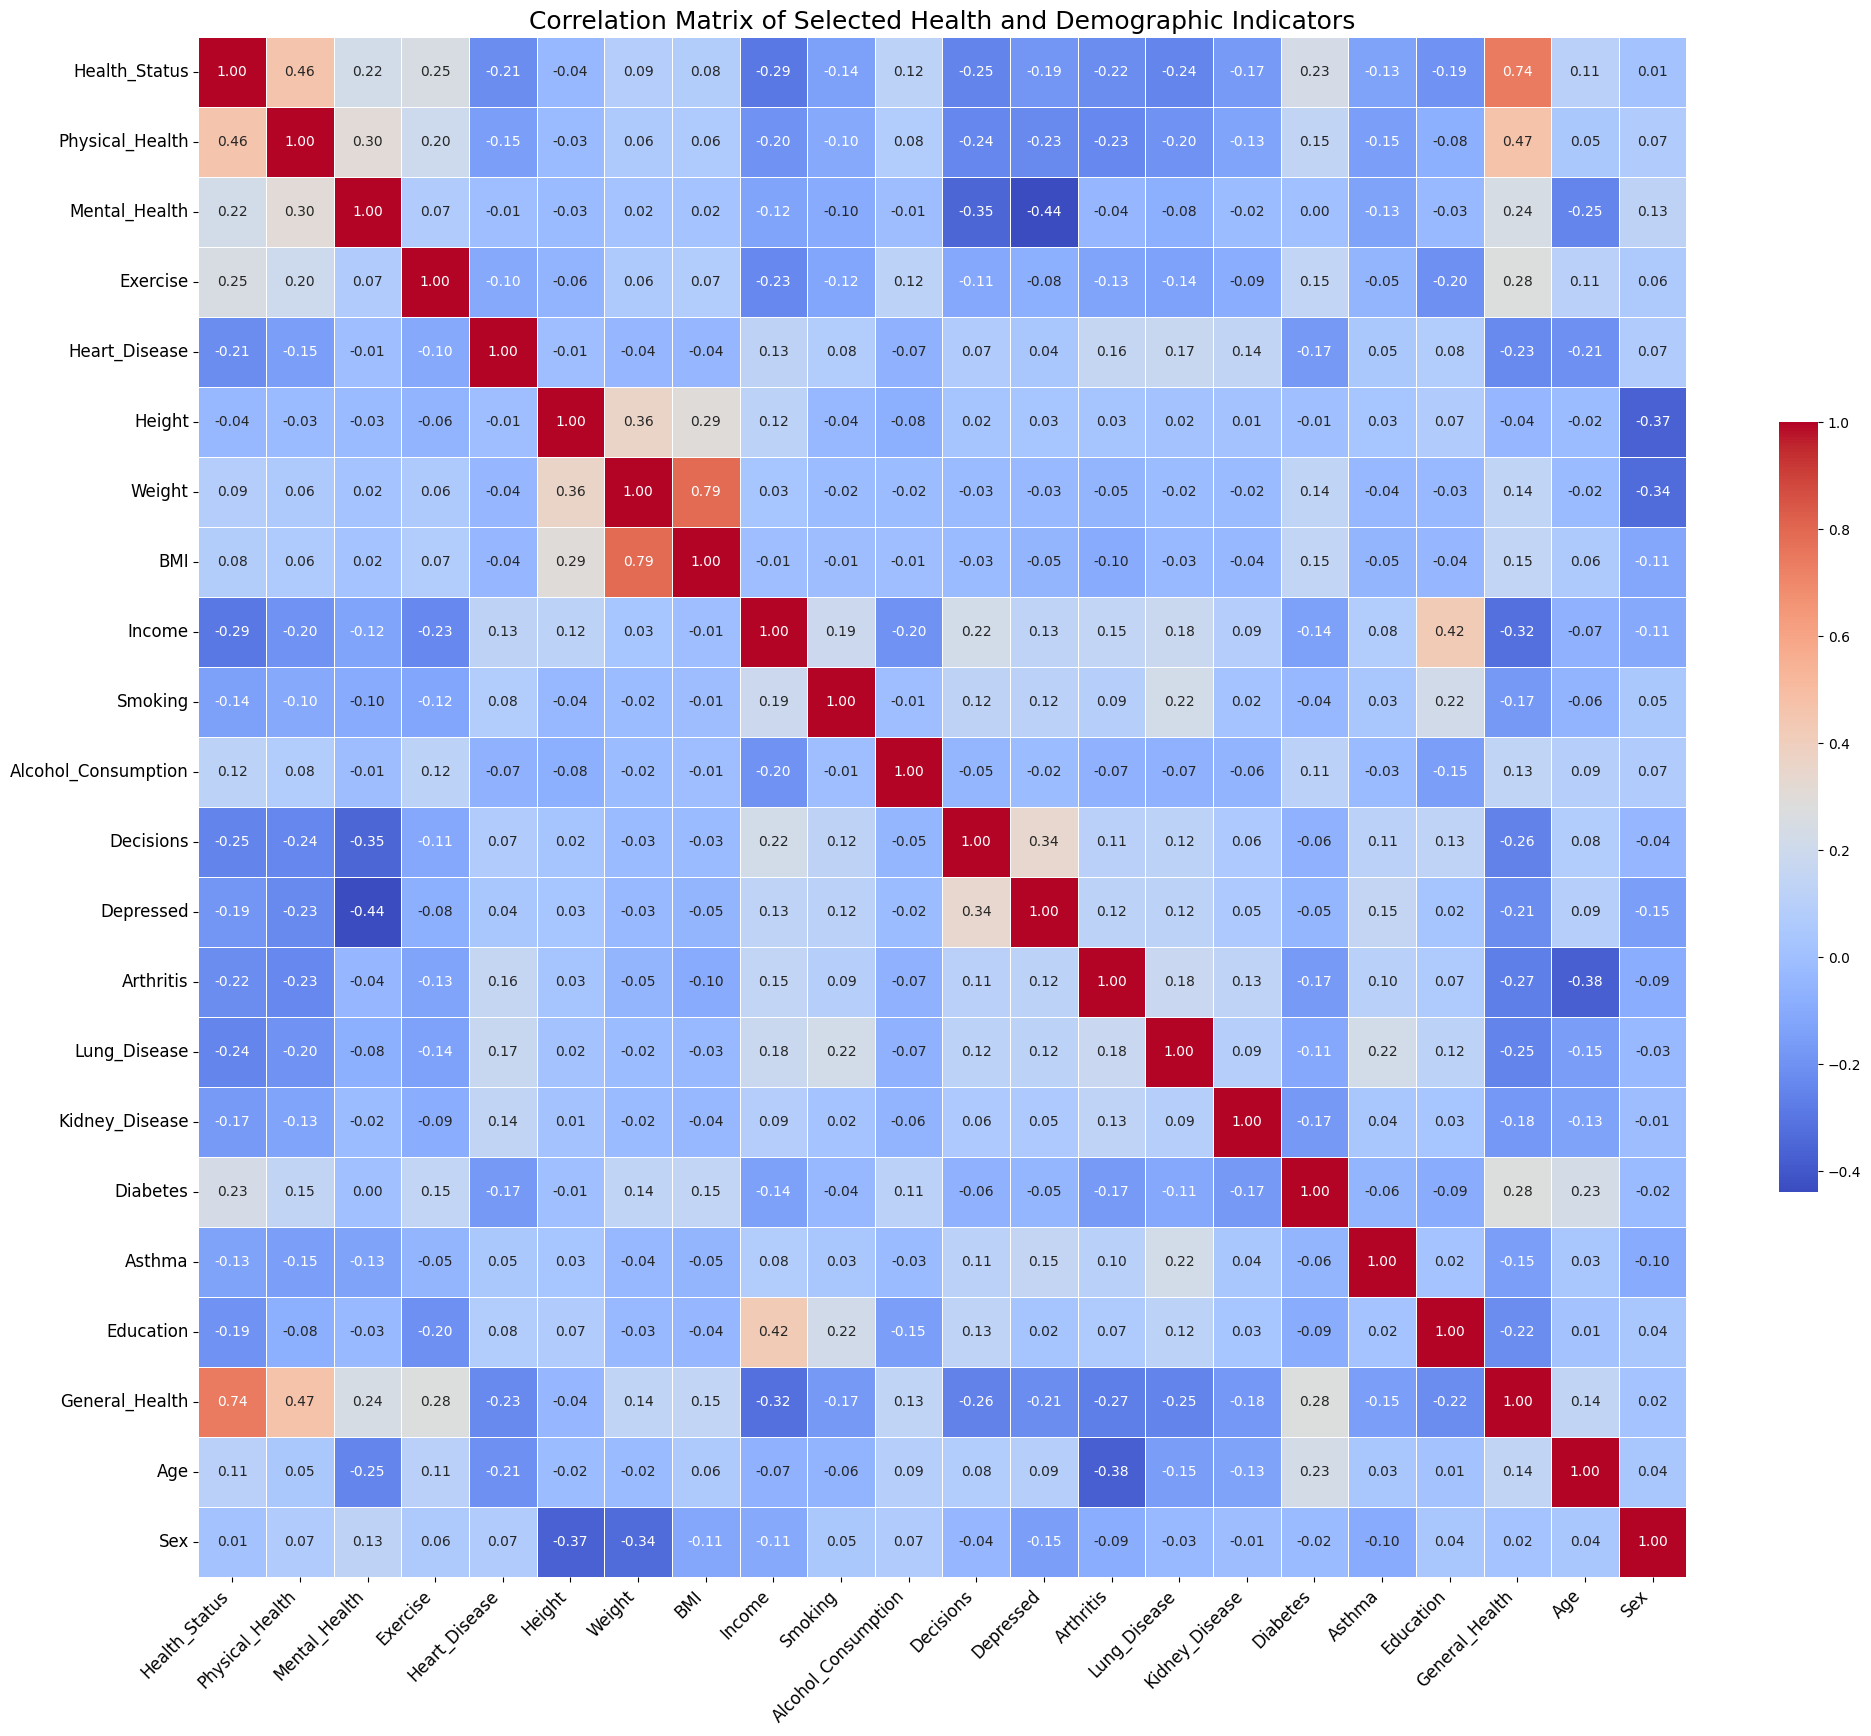

In [9]:
import seaborn as sns

# Computing the correlation matrix
correlation_matrix_full_cleaned = df_health.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix_full_cleaned, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={'shrink': 0.5}, annot_kws={"size": 10})
plt.title('Correlation Matrix of Selected Health and Demographic Indicators', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

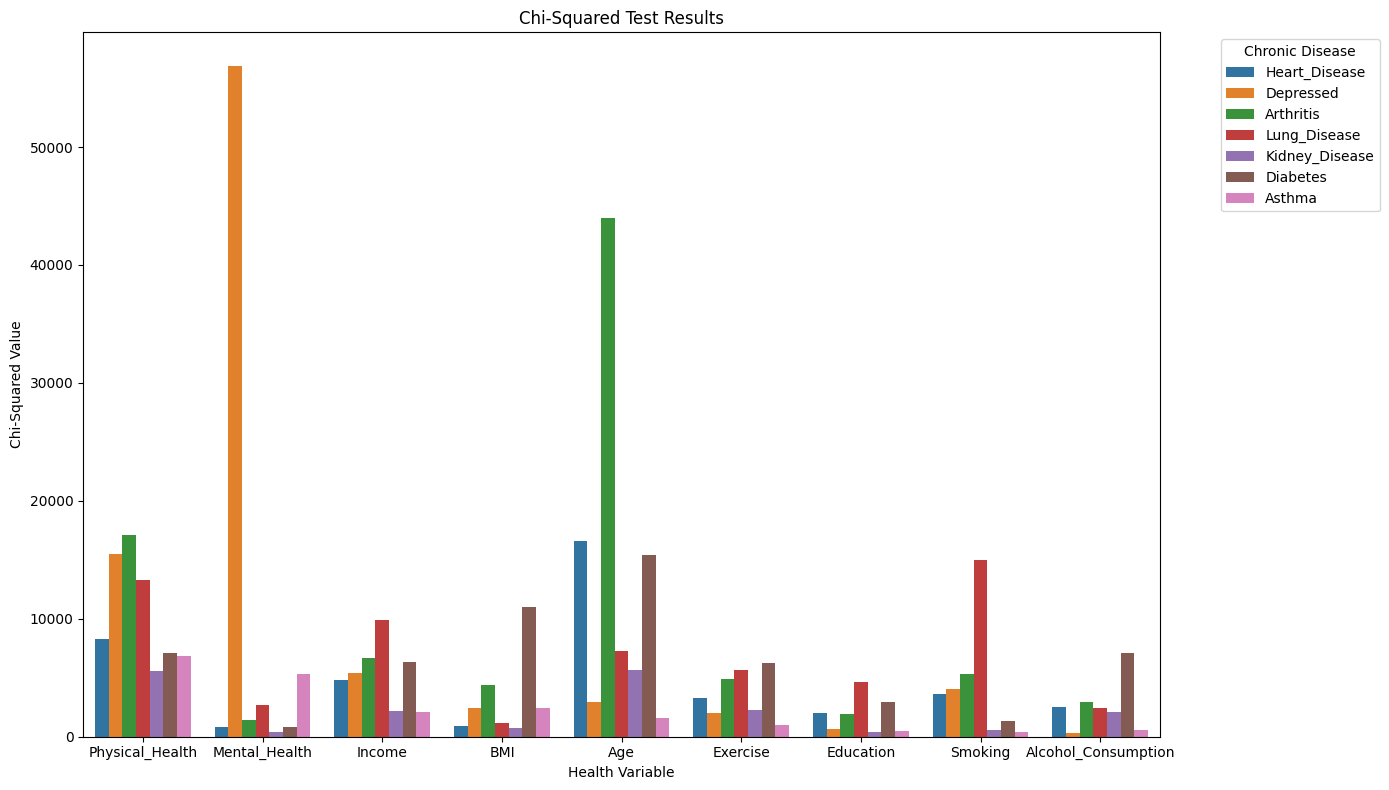

In [10]:
import scipy.stats as stats

# List of chronic diseases
chronic_diseases = ['Heart_Disease', 'Depressed', 'Arthritis', 'Lung_Disease', 'Kidney_Disease', 'Diabetes', 'Asthma']

# List of health status variables
health_vars = ['Physical_Health', 'Mental_Health', 'Income', 'BMI', 'Age', 'Exercise', 'Education', 'Smoking','Alcohol_Consumption']

# Function to perform Chi-Squared tests
def chi_squared_test(data, var1, var2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
    return chi2, p

# Perform Chi-Squared tests for each combination of health variables and chronic diseases
results = []
for hv in health_vars:
    for cd in chronic_diseases:
        chi2, p = chi_squared_test(df_health, hv, cd)
        results.append({'Health_Var': hv, 'Chronic_Disease': cd, 'Chi2': chi2, 'p-value': p})

results_df = pd.DataFrame(results)


plt.figure(figsize=(14, 8))
sns.barplot(x='Health_Var', y='Chi2', hue='Chronic_Disease', data=results_df)
plt.title('Chi-Squared Test Results')
plt.ylabel('Chi-Squared Value')
plt.xlabel('Health Variable')
plt.legend(title='Chronic Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


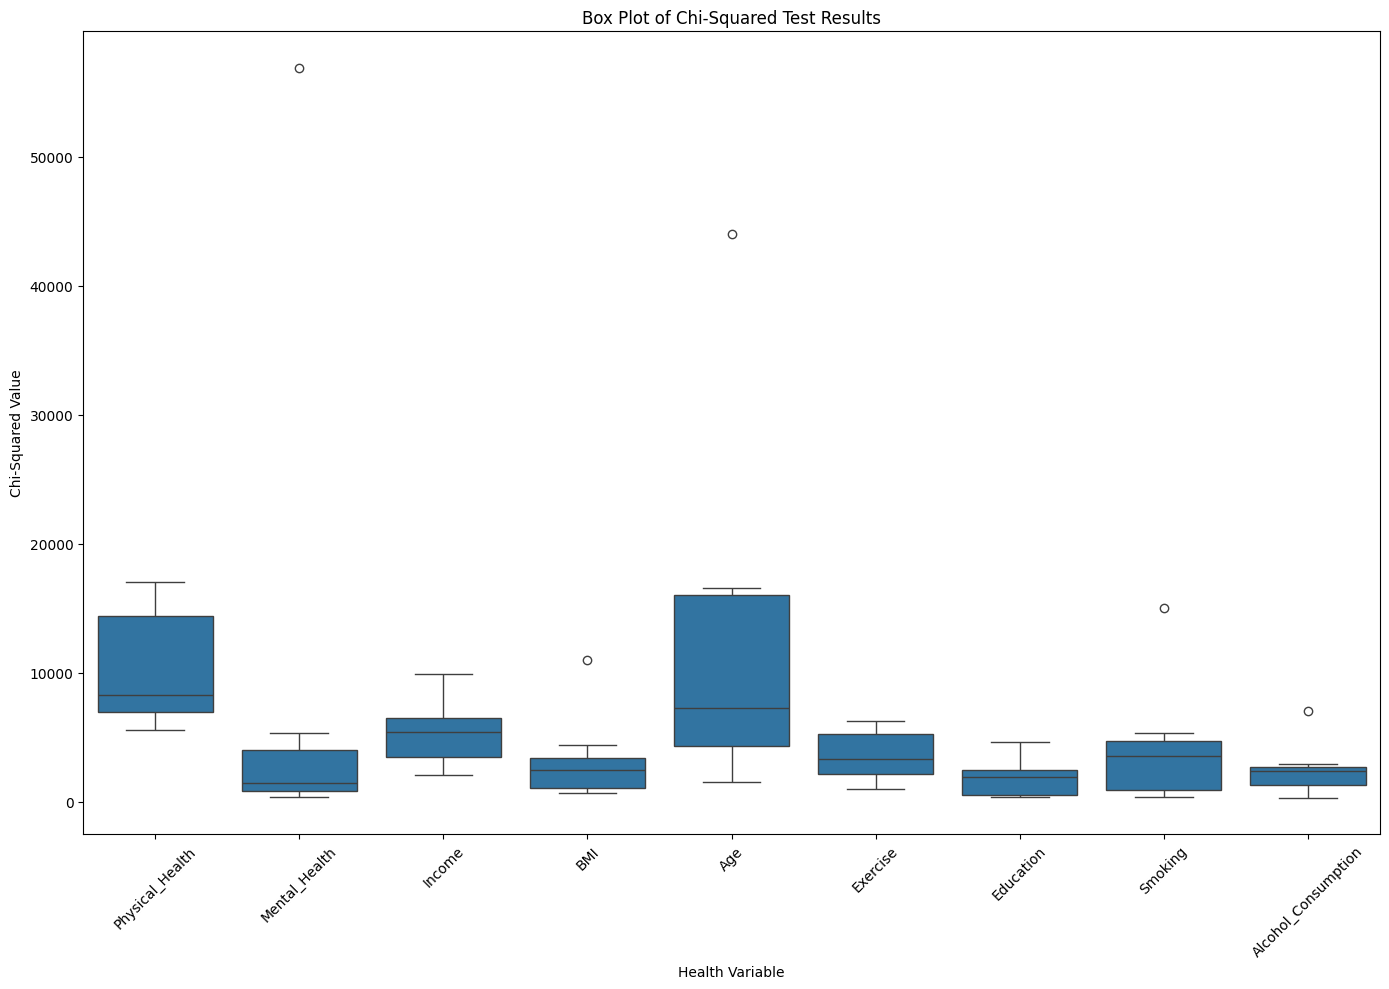

In [11]:
# Plot Box Plot
plt.figure(figsize=(14, 10))
sns.boxplot(x='Health_Var', y='Chi2', data=results_df)
plt.title('Box Plot of Chi-Squared Test Results')
plt.ylabel('Chi-Squared Value')
plt.xlabel('Health Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

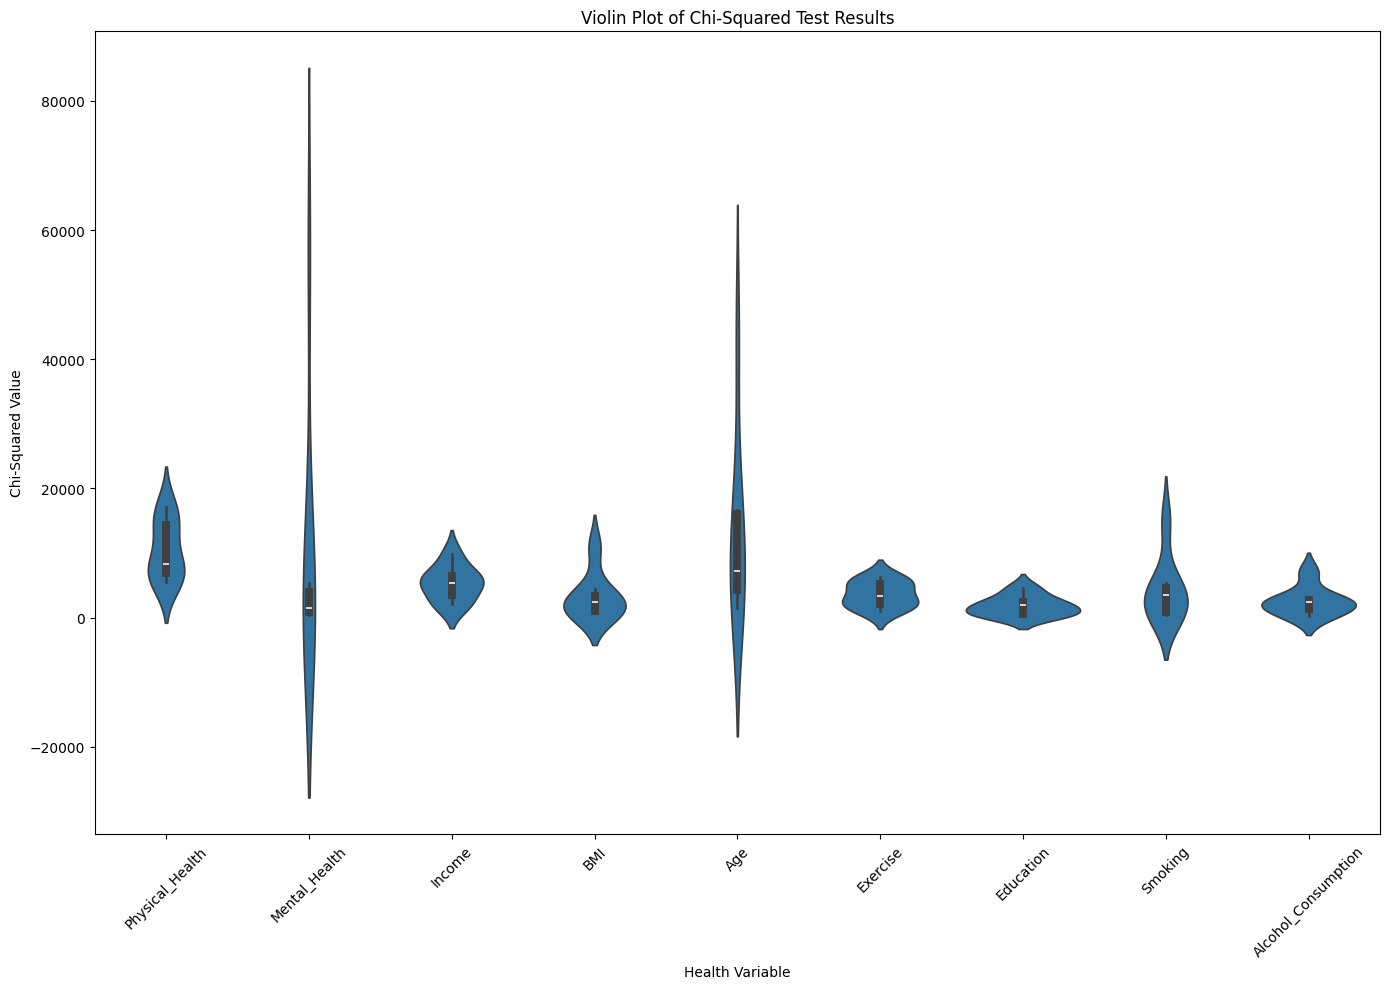

In [12]:
# Plot Violin Plot
plt.figure(figsize=(14, 10))
sns.violinplot(x='Health_Var', y='Chi2', data=results_df)
plt.title('Violin Plot of Chi-Squared Test Results')
plt.ylabel('Chi-Squared Value')
plt.xlabel('Health Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

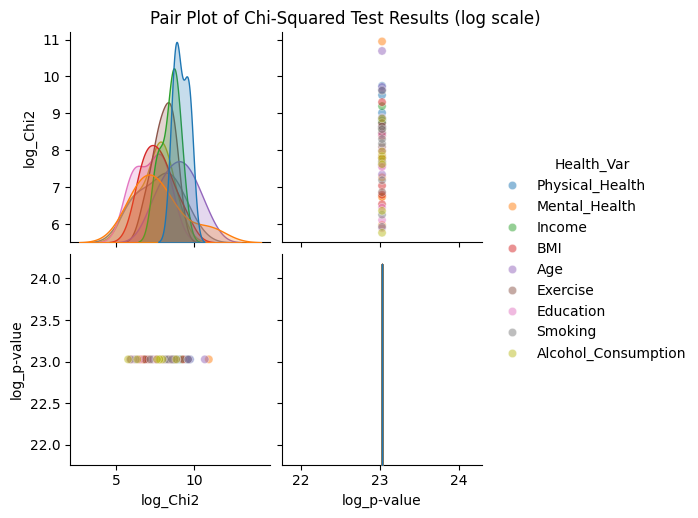

In [13]:
# Convert Chi2 and p-value to log scale for better visualization in pair plot
results_df['log_Chi2'] = results_df['Chi2'].apply(lambda x: np.log(x + 1))
results_df['log_p-value'] = results_df['p-value'].apply(lambda x: -np.log(x + 1e-10))

# Pair plot
sns.pairplot(results_df, vars=['log_Chi2', 'log_p-value'], hue='Health_Var', palette='tab10', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Chi-Squared Test Results (log scale)', y=1.02)
plt.show()

In [14]:
results_df.to_csv("Chi_square_results.csv")